##  PREPROCESSING & MODELING

THis is where after the data has been preprocessed,  machine learning models will be built, tested and the best performing model to be implemented during deployment

In [4]:
# Load the clean dataset

import pandas as pd

data = pd.read_csv('/Users/RyanMburu/Desktop/DS Projects/Thyroid Disease Detector/Datasets/clean_hypothyroid2.csv')
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,0,41,F,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,1,70,F,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,2,80,F,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,3,66,F,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,4,68,M,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


In [9]:
# Drop the redundant index column
data.drop(columns=('Unnamed: 0'), axis=1, inplace=True)

data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


The project is a classification problem, as the output is YES/NO or 1/2

We need to perform preprocessing

## Data Preprocessing

### 1. Feature Encoding

This is where categorical data that is in string form (t/f, etc) will be transformed to numerical data

In [5]:
# will perform label encoding on the categorical data all over the dataset

# Will make use of codes

codes = {'f' : 0, 't' : 1}
codes


{'f': 0, 't': 1}

In [10]:
# Apply on every column necessary

data['on thyroxine'] = data['on thyroxine'].replace(codes)
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,0,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,0,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,0,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,0,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,0,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,19,F,0,f,f,f,f,f,f,f,...,f,f,f,8.80,2.7,108.0,1.11,97.0,other,1
2745,68,F,0,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,0
2746,74,F,0,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,0
2747,72,M,0,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,0


In [11]:
# Function that inputs codes per indicated column

def label_encoder(column):
    data[column] = data[column].replace(codes)

In [13]:
label_encoder('query on thyroxine')

In [15]:
# Copy paste the rest of the columns and run at once
label_encoder('on antithyroid medication')
label_encoder('sick')
label_encoder('pregnant')
label_encoder('thyroid surgery')
label_encoder('I131 treatment')
label_encoder('query hypothyroid')
label_encoder('query hyperthyroid')
label_encoder('lithium')
label_encoder('goitre')
label_encoder('tumor')
label_encoder('hypopituitary')
label_encoder('psych')


In [17]:
# Will do the same process on gender column

# This is important so as to avoid using alot of libraries,and practice my craft as a programmer

codes = {'F' : 0, 'M' : 1, 'NS' : 2}

data['sex'] = data['sex'].replace(codes)

In [19]:
# Drop referal source column, as the hospital you were refered from cannot influence whether you have an ailment or not

data.drop(columns = ('referral source'), axis = 1, inplace = True)

In [20]:
# Output final dataset
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,output
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8.80,2.7,108.0,1.11,97.0,1
2745,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.00,2.1,124.0,1.08,114.0,0
2746,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.10,1.8,112.0,1.07,105.0,0
2747,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.70,2.0,82.0,0.94,87.0,0


### 2. Feature Reduction / Feature Selection

 - Disclaimer :  Decided to do reduction before normalization as when conducting research, I saw that decision tree models are normally not affected by the scale of the inputs, unlike distance-based models such as K-Nearest Neighbours models and SVM's

Feature selection is where we will choose the most important features for our modelling phase

Will use Random Forest and check for feature importance as a trick to see which features contributed the most to prediction

In [23]:
# Will split the data into arrays of data i.e X and y using the traintest split module
from sklearn.model_selection import train_test_split
# X are the features
# y is the label
X = data.loc[:, 'age' : 'FTI'].values
y = data['output'].values
# Will split X and y into training data and testing data of 80% and 20% splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test


array([[ 75.  ,   0.  ,   0.  , ..., 120.  ,   1.03, 117.  ],
       [ 63.  ,   2.  ,   0.  , ...,  89.  ,   1.04,  85.  ],
       [ 53.  ,   1.  ,   0.  , ..., 104.  ,   0.81, 128.  ],
       ...,
       [ 21.  ,   0.  ,   0.  , ..., 130.  ,   1.04, 124.  ],
       [ 73.  ,   0.  ,   0.  , ..., 113.  ,   0.74, 153.  ],
       [ 25.  ,   0.  ,   0.  , ..., 152.  ,   1.5 , 102.  ]])

In [25]:
# Will quickly build a random forest model and check for feature importance

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500, max_depth = 8, min_samples_split = 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=30, n_estimators=500)

Text(0.5, 1.0, 'A graph showing the most important features in the dataset ')

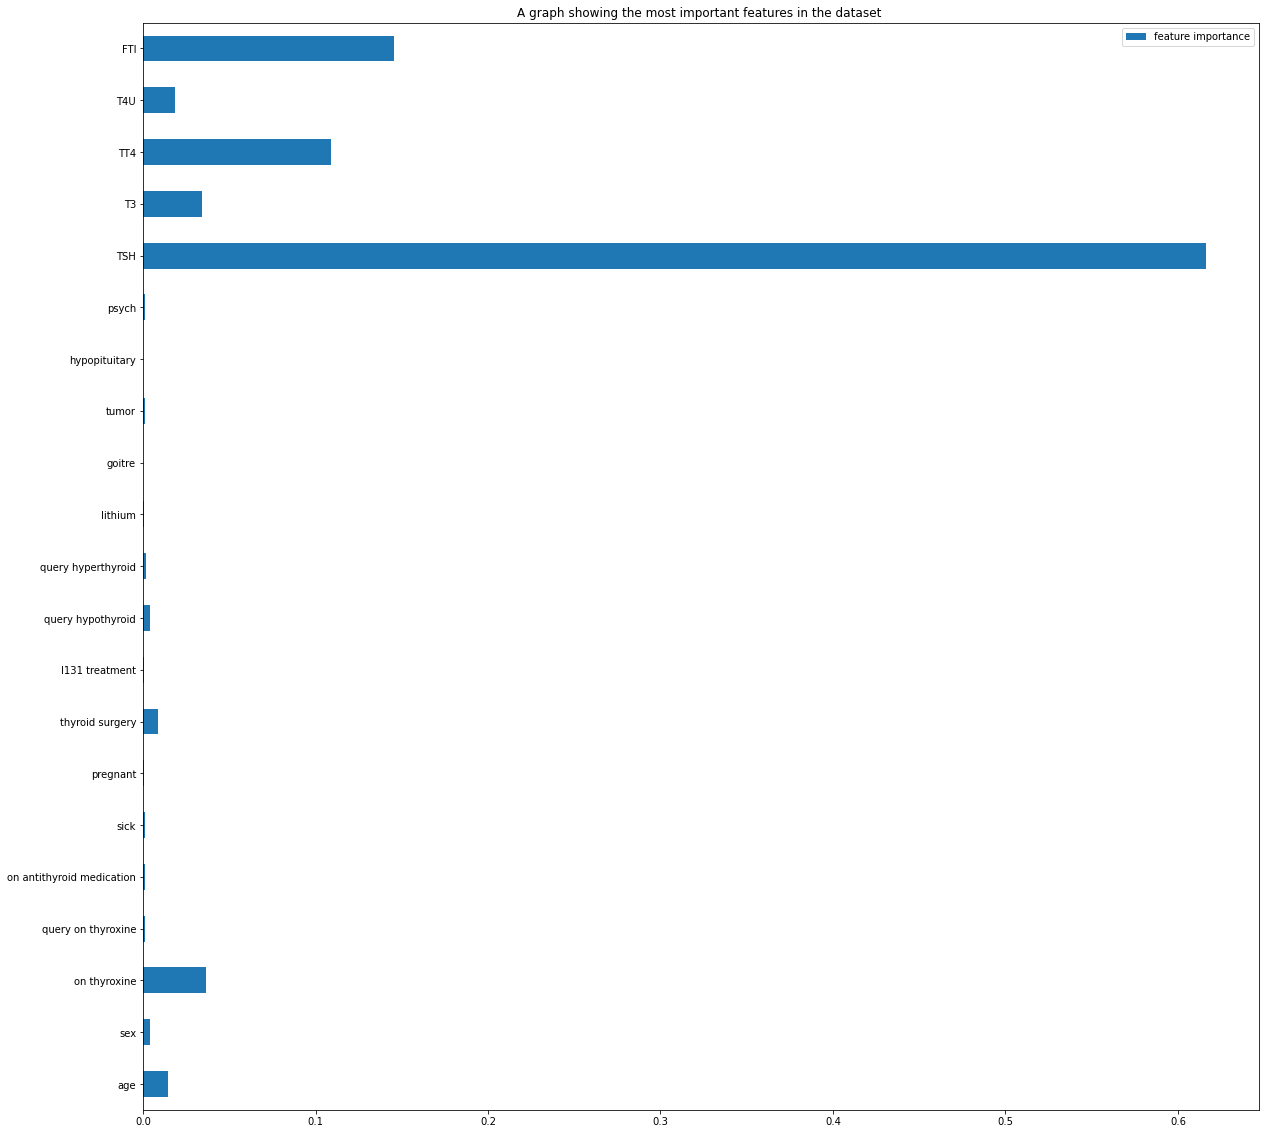

In [30]:
# Will check for feature importance, as thats our main priority
X_columns = data.loc[:, 'age' : 'FTI']
df_FI = pd.DataFrame(forest.feature_importances_, X_columns.columns, columns = ['feature importance'])

# Will first import plotting module
import matplotlib.pyplot as plt
# Plot the dataframe as a horizontal bar graph of its values
df_FI.plot(kind = 'barh', figsize = (20, 20))
plt.title('A graph showing the most important features in the dataset ')

The most important features as per the Feature Importance plot are : 
1. FTI
2. TFU
3. TT4
4. T3
5. TSH (most important)
6. Thyroid Surgery
7. On Thyroxine
8. Age

Will go ahead and extract a new dataset for modelling only using the said features

In [77]:
# New dataset with reduced features

data_modeling = data[['age', 'on thyroxine', 'thyroid surgery', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'output']]
data_modeling

,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output
0,41,0,0,1.30,2.5,125.0,1.14,109.0,0
1,70,0,0,0.72,1.2,61.0,0.87,70.0,0
2,80,0,0,2.20,0.6,80.0,0.70,115.0,0
3,66,0,0,0.60,2.2,123.0,0.93,132.0,0
4,68,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...
2744,19,0,0,8.80,2.7,108.0,1.11,97.0,1
2745,68,0,0,1.00,2.1,124.0,1.08,114.0,0
2746,74,0,0,5.10,1.8,112.0,1.07,105.0,0
2747,72,0,0,0.70,2.0,82.0,0.94,87.0,0


In [36]:
# Export modeling dataset
data_modeling.to_csv('modeling_hypothyroid.csv')

### 3. Feature normalization / Scaling

This is when the data is in different scales eg age and sex. Age ranges until 100 whereas sex is 1 and 0

This often leads to machine learning models performing poorly.

In [42]:
# Will import MinMaxScaler to have all data range from 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Will split the data to X and y then scale data in X
X = data_modeling.loc[:, 'age' : 'FTI'].values
y = data_modeling['output'].values

scaled_X = scaler.fit_transform(X)
scaled_X

array([[0.43010753, 0.        , 0.        , ..., 0.28738318, 0.47593583,
        0.27226463],
       [0.74193548, 0.        , 0.        , ..., 0.13785047, 0.3315508 ,
        0.17302799],
       [0.84946237, 0.        , 0.        , ..., 0.18224299, 0.24064171,
        0.28753181],
       ...,
       [0.78494624, 0.        , 0.        , ..., 0.25700935, 0.43850267,
        0.26208651],
       [0.76344086, 0.        , 0.        , ..., 0.18691589, 0.36898396,
        0.21628499],
       [0.67741935, 0.        , 0.        , ..., 0.22663551, 0.43850267,
        0.22900763]])

The X values have been normalized. They are now all in a range of 0 - 1

### 4. Data Splitting

This is where the data is split into two or sometimes 3 sets

1. Training set (80% of the data) -  this is the data that will train the model
2. Testing set (20%) - This will be used during testing the model's accuracy

In [56]:
# Will use the train test module that was used when building the Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 0)

# Length of training data
print(X_train.shape)

# Length of testing data
print(X_test.shape)

(2199, 8)
(550, 8)


In [67]:
import numpy as np
np.unique(y_test, return_counts = True)

(array([0, 1]), array([498,  52]))

The splitting is a success, where the training split has 2199 records of data and the testing split has 550

## Modeling

Here is where machine learning models will be built and the best performing one is chosen.

ML models to be built include : 
1. Naive Bayes
2. Random Forest
3. Boosted trees (XGBoosted trees and ADA trees)
4. K-Nearest Neighbours (KNN) / Standard Vector Machines (SVM)
5. Neural Networks 

## 1. Naive Bayes

- This is a predominantly classification algorithm that aims to calculate the probability of on escenario (in this case if a patient has hypothyroid disease) based on its relationship with anotherother scenario(their ages, TSH score etc)

- As our output is boolean (0/1), we will use bernoulli's NaiveBayes

### i. Bernoulli NB

#### Training the naive Bayes Model

In [61]:
# Will import the bernoullis naive bayes module hosted by sklearn
from sklearn.naive_bayes import BernoulliNB
#Initializing the model
NB = BernoulliNB()
# Fitting the model with training data
NB.fit(X_train, y_train)

BernoulliNB()

#### Prediction using the trained model

In [62]:
# Prediction
y_pred = NB.predict(X_test)

# Testing the accuracy
from sklearn.metrics import accuracy_score

print('accuracy of the NB model is : ', accuracy_score(y_test, y_pred))

accuracy of the NB model is :  0.9054545454545454


In [69]:
np.unique(y_pred)

array([0])

Besides having a 90% accuracy, the model was explicitly predicting 0 as the output, which is highly inaccurate.

### ii. Multinomial NB

Will do the same process, but in this case will use Multinomial Model

In [70]:
# Will import the Multinomial naive bayes module hosted by sklearn
from sklearn.naive_bayes import MultinomialNB
#Initializing the model
NB2 = MultinomialNB()
# Fitting the model with training data
NB2.fit(X_train, y_train)

MultinomialNB()

In [73]:
# Prediction
y_pred = NB2.predict(X_test)

# Testing the accuracy
print('accuracy of the NB model is : ', accuracy_score(y_test, y_pred))

# Print number of outputs
print(np.unique(y_pred))

accuracy of the NB model is :  0.9072727272727272
[0 1]


In the case of Multinomial NB, it has a 90% accuracy, but logically performs better than the Bernoulli's one as it predicts both positive cases and negative

### iii. Naive Bayes with hot encoded labels

In [79]:
data_dummy = data_modeling
data_dummy = pd.get_dummies(data_dummy, columns = ['output'])
data_dummy

,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output_0,output_1
0,41,0,0,1.30,2.5,125.0,1.14,109.0,1,0
1,70,0,0,0.72,1.2,61.0,0.87,70.0,1,0
2,80,0,0,2.20,0.6,80.0,0.70,115.0,1,0
3,66,0,0,0.60,2.2,123.0,0.93,132.0,1,0
4,68,0,0,2.40,1.6,83.0,0.89,93.0,1,0
...,...,...,...,...,...,...,...,...,...,...
2744,19,0,0,8.80,2.7,108.0,1.11,97.0,0,1
2745,68,0,0,1.00,2.1,124.0,1.08,114.0,1,0
2746,74,0,0,5.10,1.8,112.0,1.07,105.0,1,0
2747,72,0,0,0.70,2.0,82.0,0.94,87.0,1,0


In [88]:
# Normalize data in X and have y as two columns
X2 = data_dummy[['age', 'on thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].values
y2 = data_dummy[['output_0', 'output_1']]

In [89]:
# Scaling
scaled_X2 = scaler.fit_transform(X2)
scaled_X2

array([[0.43010753, 0.        , 0.00244342, ..., 0.28738318, 0.47593583,
        0.27226463],
       [0.74193548, 0.        , 0.00134907, ..., 0.13785047, 0.3315508 ,
        0.17302799],
       [0.84946237, 0.        , 0.00414155, ..., 0.18224299, 0.24064171,
        0.28753181],
       ...,
       [0.78494624, 0.        , 0.0096133 , ..., 0.25700935, 0.43850267,
        0.26208651],
       [0.76344086, 0.        , 0.00131133, ..., 0.18691589, 0.36898396,
        0.21628499],
       [0.67741935, 0.        , 0.00187738, ..., 0.22663551, 0.43850267,
        0.22900763]])

In [90]:
#Splitting
# Will use the train test module that was used when building the Random Forest Model
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_X2, y2, test_size = 0.2, random_state = 0)

# Length of training data
print(X_train2.shape)

# Length of testing data
print(X_test2.shape)

(2199, 7)
(550, 7)


In [91]:
# Modeling
# Will import the Multinomial naive bayes module hosted by sklearn
#Initializing the model
NB3 = MultinomialNB()
# Fitting the model with training data
NB3.fit(X_train2, y_train2)

ValueError: y should be a 1d array, got an array of shape (2199, 2) instead.

Hot encoded values cant work as y. This is only applicable in Neural Networks, as it can have more than one output.

## 2. Random Forests

This is a Machine Learning technique where multiple decision trees are created and combined to derive an output. 

As known by most ML engineers, random forests usually do not require the data to be normalized/standadized in any form

In [5]:
# Load dataset

data_RF = pd.read_csv('Datasets/modeling_hypothyroid.csv')
data_RF


,Unnamed: 0,age,on thyroxine,thyroid surgery,TSH,T3,TT4,T4U,FTI,output
0,0,41,0,0,1.30,2.5,125.0,1.14,109.0,0
1,1,70,0,0,0.72,1.2,61.0,0.87,70.0,0
2,2,80,0,0,2.20,0.6,80.0,0.70,115.0,0
3,3,66,0,0,0.60,2.2,123.0,0.93,132.0,0
4,4,68,0,0,2.40,1.6,83.0,0.89,93.0,0
...,...,...,...,...,...,...,...,...,...,...
2744,2744,19,0,0,8.80,2.7,108.0,1.11,97.0,1
2745,2745,68,0,0,1.00,2.1,124.0,1.08,114.0,0
2746,2746,74,0,0,5.10,1.8,112.0,1.07,105.0,0
2747,2747,72,0,0,0.70,2.0,82.0,0.94,87.0,0


In [6]:
# Splitting
# Will split the data into arrays of data i.e X and y using the traintest split module
from sklearn.model_selection import train_test_split
# X are the features
# y is the label
X = data_RF.loc[:, 'age' : 'FTI'].values
y = data_RF['output'].values
# Will split X and y into training data and testing data of 80% and 20% splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_test.shape

(825, 8)

In [7]:
#Building model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 300, max_depth = 8, min_samples_split = 30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=30, n_estimators=300)

In [8]:
# Checking the model's accuracy

y_pred = forest.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy of the RF model is : ', accuracy_score(y_test, y_pred))

accuracy of the RF model is :  0.9915151515151515


UUm ok the RF model has an accuracy of 98%.

Text(0.5, 1.0, 'A graph showing the most important features in the dataset ')

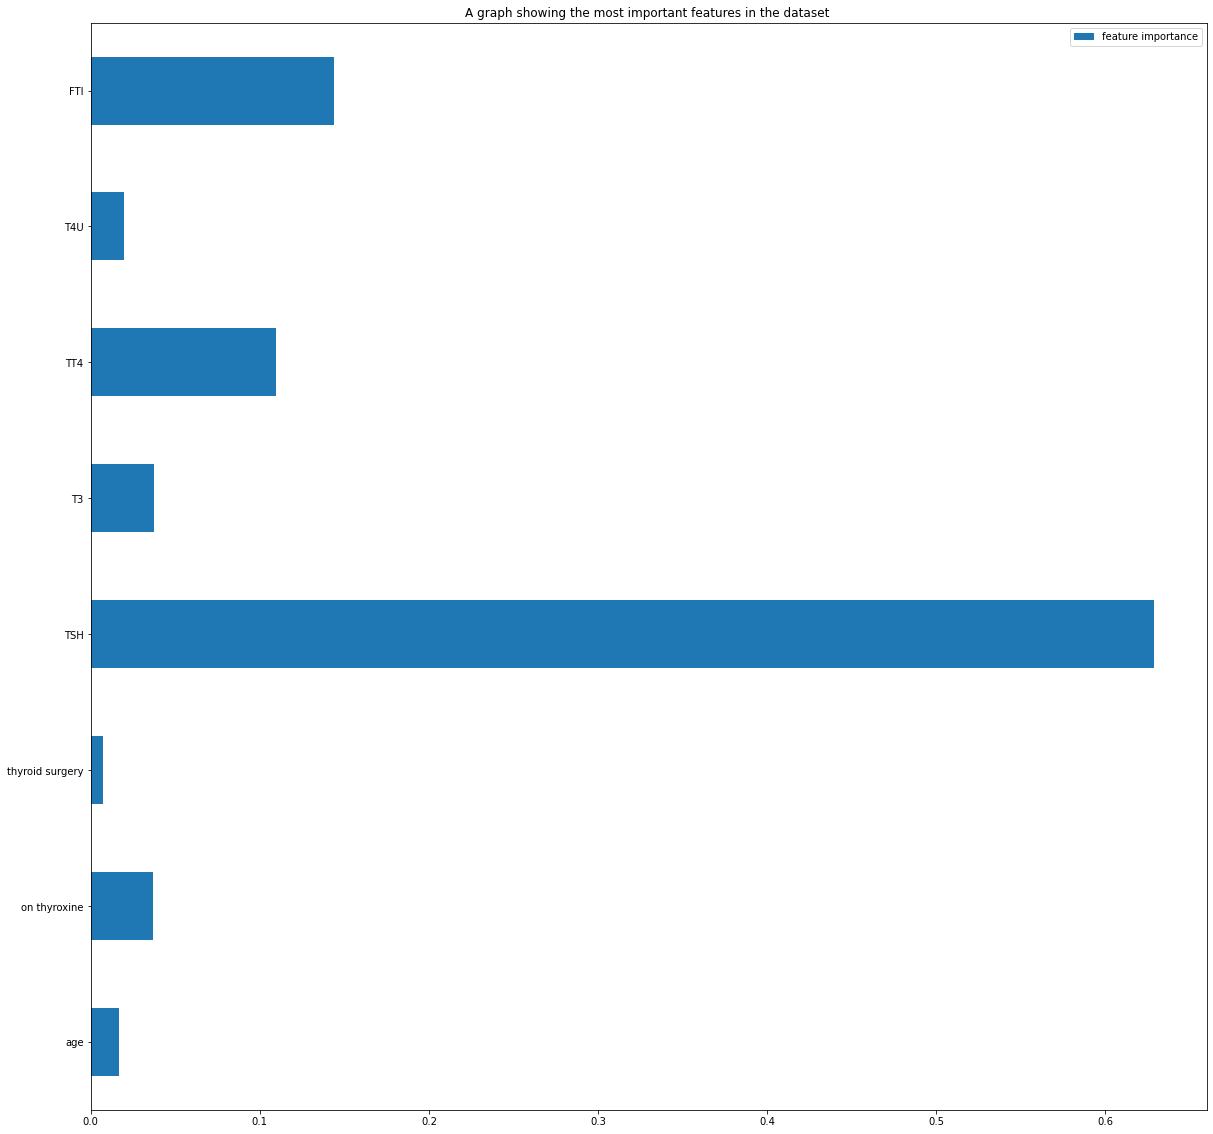

In [9]:
# Feature importance
X_columns = data_RF.loc[:, 'age' : 'FTI']
df_FI = pd.DataFrame(forest.feature_importances_, X_columns.columns, columns = ['feature importance'])

# Will first import plotting module
import matplotlib.pyplot as plt
# Plot the dataframe as a horizontal bar graph of its values
df_FI.plot(kind = 'barh', figsize = (20, 20))
plt.title('A graph showing the most important features in the dataset ')

As seen, the importances of the inputs have been displayed, TSH being the most important feature and thyroid surgery is the least important

## Draft Deployment

Will perform a mock deployment using foreign data, so as to test the performance of our model.

In [2]:
# Function that asks for user input and displays the inputs

import numpy as np

def thyroid_predictor():
    # Patients inputs
    age = int(input('Whats the patients age ? :'))
    on_thyroxine = int(input('Is the patient on thyroxine medication ? :'))
    thyroid_surgery = int(input('Has the patient had previous surgery on thyroid gland? : '))
    TSH = float(input('Whats the patients TSH value? : '))
    T3 = float(input('Whats the patients T3 value? : '))
    TT4 = float(input('Whats the patients TT4 value? : '))
    T4U = float(input('Whats the patients T4U value? : '))
    FTI = float(input('Whats the patients FTI value? : '))

    patient_details = np.array([age, on_thyroxine, thyroid_surgery, TSH, T3, TT4, T4U, FTI]).reshape(1, -1)

    # Inputs are fed into the Random Forest model created and tested
    diagnosis = forest.predict(patient_details)

    return diagnosis

In [39]:
# Situation where the patient does not have the disease
thyroid_predictor()

array([0])

## Exporting model

In [12]:
import pickle

In [13]:
pickle_model = 'thyroid_model.pkl'

with open(pickle_model, 'wb') as file:
    pickle.dump(forest, file)

In [14]:
# Loading the model
with open(pickle_model, 'rb') as file:
    forest_model = pickle.load(file)

In [15]:
# Called model
forest_model

RandomForestClassifier(max_depth=8, min_samples_split=30, n_estimators=300)